# PROGETTO 1 SOCIAL COMPUTING

## 1. Download Followers e Friends
Scaricate utenti followers (api.followers) e utenti following (api.friends) di
questi cinque account (i dati numerici potrebbero subire minime variazioni):
- @mizzaro - 156 Follower - 331 Following
- @damiano10 - 785 Follower - 836 Following
- @Miccighel_ - 331 Follower - 211 Following
- @eglu81 - 540 Follower - 621 Following
- @KevinRoitero - 103 Follower - 256 Following

### 1.1 Setup

Importazione delle librerie necessarie, autenticazione twitter e inizializzazione delle funzioni

In [1]:
from config import *
from pylab import rcParams
from pyvis.network import Network
import os
import json
import pprint
import tweepy
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
if(api.verify_credentials):
    print('Authentication completed succesfully!')

Authentication completed succesfully!


In [3]:
pp = pprint.PrettyPrinter()
data_folder = "data"
#caratteri per la modifica del testo in print
underline = "\033[4m"
fail = "\033[91m"
bold = "\033[1m"
endc = "\033[0m"

creators = ["Altamura Emanuele", "Lanzaro Claudio", "Mergan Samuele", "Rosso Thomas"]


def serialize_json(folder, filename, data):
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)
    with open(f"{folder}/{filename}", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    print(f"Data serialized to path: {folder}/{filename}")

    
def read_json(path):
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as file:
            data = json.load(file)
        print(f"Data read from path: {path}")
        return data
    else:
        print(f"No data found at path: {path}")
        return {}

def jsonAppend(json1, json2):
    json = json1 + json2
    json = list(set(json))
    return json

def getData(account):
    print(f"Getting ID-FollowersQuantity-FriendsQuantity of: {account}")
    json_data = api.get_user(account)._json
    data = []
    data.append(json_data['id_str'])
    data.append(json_data['followers_count'])
    data.append(json_data['friends_count'])
    data.append(json_data['protected'])
    return data


def getFollowers(account, ids, quantity, path, save=True):
    for item in tweepy.Cursor(
            api.followers,
            id=account,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):

        json_data = item._json
        found_follower = json_data["id_str"]
        
        if found_follower not in ids:
            ids.append(found_follower)
        print(f"Processing Follower #{len(ids)} of account: {account}")
    
    if(save==True): 
        serialize_json(data_folder, path, ids)
   
    print(f"Processing Followers Completed")
    

def getFriends(account, ids, quantity, path, save=True):
    
    for item in tweepy.Cursor(
            api.friends,
            id=account,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):

        json_data = item._json
        found_follower = json_data["id_str"]
        
        if found_follower not in ids:
            ids.append(found_follower)
        print(f"Processing Friend #{len(ids)} of account: {account}")
    
    if(save==True): 
        serialize_json(data_folder, path, ids)
        
    print(f"Processing Friends Completed")

    

print("Setup Completed")

Setup Completed


### 1.2 Account da Analizzare

Salvataggio dei dati essenziali per l'analisi degli account assegnati

In [12]:
account_to_analyze = ["mizzaro", "damiano10", "Miccighel_", "eglu81", "KevinRoitero"]
account_to_analyze_id = []
account_to_analyze_followers_quantity = []
account_to_analyze_friends_quantity = []

for x in account_to_analyze:
    data = getData(x)
    account_to_analyze_id.append(data[0])
    account_to_analyze_followers_quantity.append(data[1])
    account_to_analyze_friends_quantity.append(data[2])
    
print(f"Account to Analyze: {account_to_analyze}")
print(f"Account to Analyze ID: {account_to_analyze_id}")
print(f"Account to Analyze Followers Quantity: {account_to_analyze_followers_quantity}")
print(f"Account to Analyze Friends Quantity: {account_to_analyze_friends_quantity}")

Getting ID-FollowersQuantity-FriendsQuantity of: mizzaro
Getting ID-FollowersQuantity-FriendsQuantity of: damiano10
Getting ID-FollowersQuantity-FriendsQuantity of: Miccighel_
Getting ID-FollowersQuantity-FriendsQuantity of: eglu81
Getting ID-FollowersQuantity-FriendsQuantity of: KevinRoitero
Account to Analyze: ['mizzaro', 'damiano10', 'Miccighel_', 'eglu81', 'KevinRoitero']
Account to Analyze ID: ['18932422', '132646210', '15750573', '19659370', '3036907250']
Account to Analyze Followers Quantity: [158, 792, 334, 540, 102]
Account to Analyze Friends Quantity: [331, 843, 212, 624, 256]


### 1.3 Salvataggio ID Followers e Friends

Vengono salvati gli id dei followers e dei friends, in un file json, per ognuno dei cinque account.

In [ ]:
#mizzaro
account_id = account_to_analyze_id[0]
followers_quantity = account_to_analyze_followers_quantity[0]
friends_quantity = account_to_analyze_friends_quantity[0]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[0]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[0]+"FriendIDs.json")

In [ ]:
#damiano10
account_id = account_to_analyze_id[1]
followers_quantity = account_to_analyze_followers_quantity[1]
friends_quantity = account_to_analyze_friends_quantity[1]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[1]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[1]+"FriendIDs.json")

In [ ]:
#Miccighel_
account_id = account_to_analyze_id[2]
followers_quantity = account_to_analyze_followers_quantity[2]
friends_quantity = account_to_analyze_friends_quantity[2]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[2]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[2]+"FriendIDs.json")

In [ ]:
#eglu81
account_id = account_to_analyze_id[3]
followers_quantity = account_to_analyze_followers_quantity[3]
friends_quantity = account_to_analyze_friends_quantity[3]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[3]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[3]+"FriendIDs.json")

In [ ]:
#KevinRoitero
account_id = account_to_analyze_id[4]
followers_quantity = account_to_analyze_followers_quantity[4]
friends_quantity = account_to_analyze_friends_quantity[4]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[4]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, account_to_analyze[4]+"FriendIDs.json")

In [ ]:
#Versione con un unico ciclo da inserire nella relazione 
for x in range(len(account_to_analyze)):
    account_id = account_to_analyze_id[x]
    followers_quantity = account_to_analyze_followers_quantity[x]
    friends_quantity = account_to_analyze_friends_quantity[x]
    account_ids = []
    getFollowers(account_id, account_ids, followers_quantity, account_to_analyze[x]+"FollowerIDs.json")
    account_ids = []
    getFriends(account_id, account_ids, friends_quantity, account_to_analyze[x]+"FriendIDs.json")

## 2. Followers dei Followers
IMPORTANTE!!! Nella relazione scrivere anche della possibilità di usare random.sample()

Scegliete 5 utenti followers a caso tra quelli di ciascuno dei cinque account e scaricate ulteriori 10 utenti followers (followers dei followers)

### 2.1 Cinque Followers Random

In [ ]:
def randomizeFollower(read_path, ids):
    print(f"Getting Randomized Followers from {read_path}")
    data_account = read_json(read_path)
    for x in range(5):
        randomizeFollowerRec(data_account, ids)

def randomizeFollowerRec(data_ids, ids):
    rand = random.choice(data_ids)
    user_data = getData(rand)
    if(rand in ids):
        randomizeFollowerRec(data_ids, ids)
    elif(user_data[3]):
        randomizeFollowerRec(data_ids, ids)
    elif(user_data[1] <=10):
        randomizeFollowerRec(data_ids, ids)
    else:
        ids.append(rand)

Randomizzazione di 25 follower totali, 5 per ogni account iniziale

In [ ]:
follower_ids = []
for x in account_to_analyze:
    randomizeFollower("data/"+x+"FollowerIDs.json", follower_ids)

print(f"{len(follower_ids)} Followers of Followers: {follower_ids}")

### 2.2 Dieci Followers dei Followers
Salvataggio degli ID di 10 Followers per ognuno dei Follower ottenuti precedentemente

In [ ]:
account_ids = []
for x in follower_ids:
    getFollowers(x, account_ids, 10, "FollowerOfFollowerIDs.json", False)

serialize_json(data_folder, "FollowerOfFollowerIDs.json", account_ids)

## 3 Friends dei Friends

Scegliete 5 utenti following a caso tra quelli di ciascuno dei cinque account e scaricate ulteriori 10 utenti following (following dei following)


### 3.1 Cinque Friends Random

In [ ]:
def randomizeFriend(read_path, ids):
    print(f"Getting Randomized Friends from {read_path}")
    data_account = read_json(read_path)
    for x in range(5):
        randomizeFriendRec(data_account, ids)

def randomizeFriendRec(data_ids, ids):
    rand = random.choice(data_ids)
    user_data = getData(rand)
    if(rand in ids):
        randomizeFriendRec(data_ids, ids)
    elif(user_data[3]):
        randomizeFriendRec(data_ids, ids)
    elif(user_data[2] <=10):
        randomizeFriendRec(data_ids, ids)
    else:
        ids.append(rand)

Randomizzazione di 25 friend totali, 5 per ogni account iniziale

In [ ]:
friend_ids = []
#randomizzazione di 25 friends totali
for x in account_to_analyze:
    randomizeFriend("data/"+x+"FriendIDs.json", friend_ids)

print(f"{len(friend_ids)} Friends of Friends: {friend_ids}")

### 3.2 Dieci Friends dei Friends

Salvataggio degli ID di 10 Friend dei Friend

In [ ]:
account_ids = []
for x in friend_ids:
    getFriends(x, account_ids, 10, "FriendOfFriendIDs.json", False)

serialize_json(data_folder, "FriendOfFriendIDs.json", account_ids)

### 3.3 Salvataggio di tutti gli ID in un unico file

In [ ]:
all_ids = []
# aggiunta id account iniziali
for x in account_to_analyze_id:
    all_ids.append(x)
print(f"Total Account IDs: {len(all_ids)}")

# aggiunta id followers of followers e friends of friends
all_ids = jsonAppend(all_ids, read_json("data/FriendOfFriendIDs.json"))
all_ids = jsonAppend(all_ids, read_json("data/FollowerOfFollowerIDs.json"))

print(f"Total Account IDs: {len(all_ids)}")

# aggiunta id di followers e friends degli account iniziali
for x in account_to_analyze:
    all_ids = jsonAppend(all_ids, read_json("data/"+x+"FollowerIDs.json"))
    all_ids = jsonAppend(all_ids, read_json("data/"+x+"FriendIDs.json"))
    print(f"Total Account IDs: {len(all_ids)}")

# salvataggio di tutti gli id
serialize_json(data_folder, "AllIDs.json", all_ids)

## 4. Dettagli Profili
Scaricare i dettagli del profilo di tutti gli utenti recuperati


In [ ]:
def dataFrameAppend(path, data):
    dataframe = createDataFrame(data)
    dataframe.to_csv(path, mode='a', header=False, index=False)
    
def createDataFrame(data):
    json_normalized = pd.json_normalize(data)
    dataframe = pd.DataFrame(json_normalized)
    return dataframe

### 4.1 Salvataggio Dettagli Profili

Vengono presi tutti i dati ottenuti dalla funzione *get_user* e salvati in un file csv chiamato "all_nodes.csv"

In [ ]:
def getUserData(all_ids):
    all_user_data = []
    for x in all_ids:
        print(f"Processing data of account: {x}")
        try:
            user_data = api.get_user(x)._json
            all_user_data.append(user_data)
        except:
            print(f"{fail}{bold}Error with account: {x}{endc}")
    return all_user_data

In [ ]:
path = "data/all_nodes.csv"
all_ids = read_json("data/AllIDs.json")
nodes_data = getUserData(all_ids)
createDataFrame(nodes_data).to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

### 4.2 Salvataggio Archi (friendship)

Viene controllato il tipo di amicizia, tra gli account iniziali e tutti gli account ottenuti precedentemente, e viene salvato in un file csv.

Notazione CSV: source follows target

In [ ]:
def checkFriendship(source, target, path):
    print(f"Processing Friendship Between {source} and {target}")
    try:
        friendship = api.show_friendship(source_id=source, target_id=target)  
        if friendship[0].following == True :
            data = {}
            data['source'] = source
            data['target'] = target
            dataFrameAppend(path, data)
            print(f"{source} follows {target}")
        if friendship[0].followed_by == True :
            data = {}
            data['source'] = target
            data['target'] = source
            dataFrameAppend(path, data)  
            print(f"{target} follows {source}")
    except:
        print(f"{fail}{bold}Error with account: {target}{endc}")

Creazione dataframe per il salvataggio degli archi

In [ ]:
all_nodes = read_json("data/AllIDs.json")
path = "data/all_edges.csv"
columns = ["source", "target"]
pd.DataFrame(columns=columns).to_csv(path, index=False)

Salvataggio degli archi tra gli account iniziali e gli account ottenuti

In [ ]:
#mizzaro
for x in all_nodes:
    checkFriendship(account_to_analyze_id[0], x, path)
print(f"Processing Completed!")

In [ ]:
#damiano10
for x in all_nodes:
    checkFriendship(account_to_analyze_id[1], x, path)
print(f"Processing Completed!")

In [ ]:
#Miccighel_
for x in all_nodes:
    checkFriendship(account_to_analyze_id[2], x, path)
print(f"Processing Completed!")

In [ ]:
#eglu81
for x in all_nodes:
    checkFriendship(account_to_analyze_id[3], x, path)
print(f"Processing Completed!")

In [ ]:
#KevinRoitero
for x in all_nodes:
    checkFriendship(account_to_analyze_id[4], x, path)
print(f"Processing Completed!")

In [ ]:
# versione con un ciclo
for x in all_nodes:
    checkFriendship(account_to_analyze_id[0], x, path)
    checkFriendship(account_to_analyze_id[1], x, path)
    checkFriendship(account_to_analyze_id[2], x, path)
    checkFriendship(account_to_analyze_id[3], x, path)
    checkFriendship(account_to_analyze_id[4], x, path)

# versione alternativa con due cicli
for x in account_to_analyze_id:
    for y in all_nodes:
        checkFriendship(x, y, path)

#ACCOUNT DA ELIMINARE CHE NON ESISTE PIù "1319272146963673089"

Eliminazione di eventuali righe duplicate

In [ ]:
path = "data/all_edges.csv"
df = pd.read_csv(path)
print(len(df))
df.drop_duplicates(keep = "first", inplace = True)
df.to_csv(path, index=False)
print(len(df))

Unione CSV - DA NON METTERE NELLA RELAZIONE

In [ ]:
path = "data/all_edges.csv"
df1 = pd.read_csv("data/old_all_edges.csv")
print(len(df1))
df2 = pd.read_csv("data/eglu81_all_edges.csv")
print(len(df2))
df3 = pd.read_csv("data/Miccighel__all_edges.csv")
print(len(df3))
df4 = pd.read_csv("data/KevinRoitero_all_edges.csv")
print(len(df4))
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
print(len(result))

In [ ]:
result.to_csv(path, index=False)

## 5. Costruzione Rete Sociale
Costruite la rete sociale (grafo):
- Inserite l’id di ciascun utente come identificatore del nodo
- Ogni arco rappresenta una relazione follows tra due utenti
- Inserite i dettagli del profilo di ciascun utente come attributi del nodo
- Inserite i membri del vostro gruppo come attributi del grafo
- Per ogni nodo, aggiungete un attributo con il numero di follower individuati

In [11]:
def createDiGraph(nodes_path, edges_path):
    nodes_df = pd.read_csv(nodes_path)
    edges_df = pd.read_csv(edges_path)
    graph = nx.DiGraph(creators=creators)
    for index, row in nodes_df.iterrows():
        #print(type(row['id']))
        node = int(row['id'])
        graph.add_node(node, 
                       name=row['name'], 
                       title = row['screen_name'], #per la visualizzazione con pyvis DA SISTEMARE
                       screen_name=row['screen_name'], 
                       location=row['location'], 
                       description=row['description'],
                       followers_count=row['followers_count'],
                       friends_count=row['friends_count'],
                       favourites_count=row['favourites_count'],
                       statuses_count=row['statuses_count']
                      )
    for index, row in edges_df.iterrows():
        a = int(row['source'])
        #print(type(a))
        b = int(row['target'])
        #print(type(b))
        graph.add_edge(a,
                       b, 
                       #friendhip = "follows" NON NECESSARIA
                      )
    return graph

In [12]:
complete_graph = createDiGraph("data/all_nodes.csv", "data/all_edges.csv")
nx.write_gpickle(complete_graph, "data/complete_graph.pkl")

In [13]:
print(f"Graph Attributes: {complete_graph.graph}")

Graph Attributes: {'creators': ['Altamura Emanuele', 'Lanzaro Claudio', 'Mergan Samuele', 'Rosso Thomas']}


In [ ]:
print(f"Nodes Data: {complete_graph.nodes().data()}")

In [ ]:
print(f"Edges Data: {complete_graph.edges().data()}")

### 5.1 Visualizzazione Rete

In [48]:
def drawGraph(graph, save_path, label="Graph"):
    rcParams['figure.figsize'] = 20, 20
    nx.draw_networkx(
        graph,
        pos = nx.spring_layout(graph),
        node_color = '#9d12b5',
        width = 2,
        edge_cmap = plt.cm.Blues,
        with_labels = True,
        arrows=True,
        label = label
    )
    plt.savefig(save_path)
    plt.show()
    plt.close()

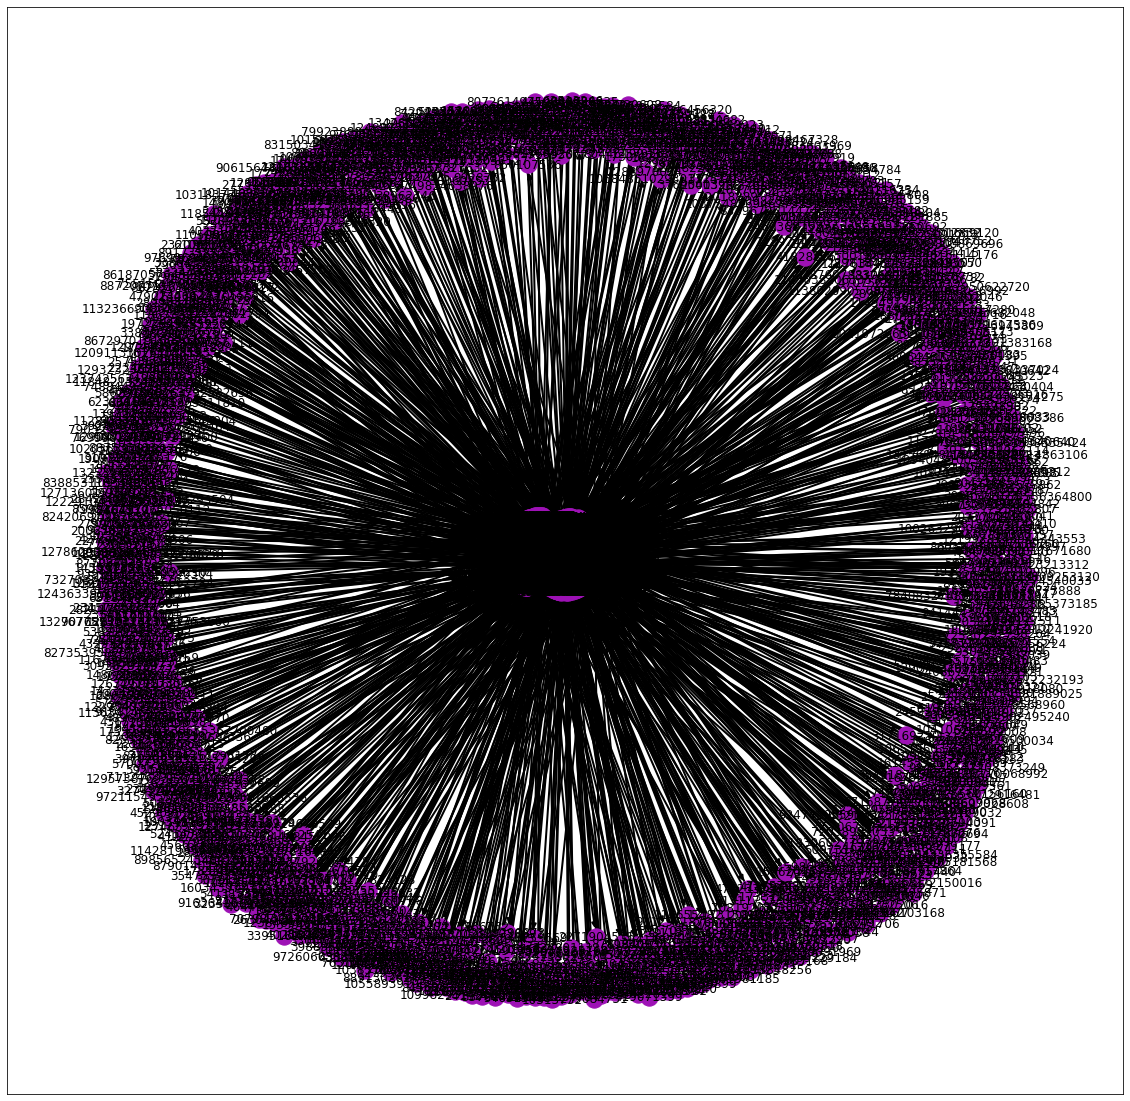

In [49]:
graph = nx.read_gpickle("data/complete_graph.pkl")
drawGraph(graph, "data/complete_graph2.pdf", "Complete Directed Graph")

## 6. Visualizzazione Rete (Pyvis)
Producete una visualizzazione interattiva del grafo usando pyvis

In [18]:
def drawGraphPyvis(graph, save_path, heading="Graph", directed=True):
    ntGraph = Network(
        height="100%", 
        width="100%", 
        bgcolor="#222222", 
        font_color="white",
        heading=heading,
        directed=directed
    )
    ntGraph.show_buttons() #sistemare
    ntGraph.barnes_hut()
    ntGraph.from_nx(graph)
    neighbor_map = ntGraph.get_adj_list()
    ntGraph.show(save_path)

In [19]:
graph = nx.read_gpickle("data/complete_graph.pkl")

print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

drawGraphPyvis(graph, "data/complete_graph.html", "Complete Directed Graph")

Number of nodes: 3124
Number of edges: 4161


## 7. Verifiche sulla Rete Sociale
Verificate se il grafo:
- è connesso (is_connected)
- è bipartito (is_bipartite)

La funzione *is_connected* funziona solo per i grafi non orientati e visto che il nostro grafo è orientato, è stato deciso di trovare le componenti debolmente e fortemente connesse.

In [20]:
def isConnected(graph):
    if nx.is_connected(graph) == True:
        print("Il grafo è connesso")
    else:
        print("Il grafo NON è connesso")

def isWeaklyConnected(graph):
    connected_components = nx.number_weakly_connected_components(graph)
    if nx.is_weakly_connected(graph) == True:
        print(f"Il grafo è debolmente connesso")
        print(f"Componenti debolmente connesse: {connected_components}")
    else:
        print(f"Il grafo NON è debolmente connesso")
        print(f"Componenti debolmente connesse: {connected_components}")

def isStronglyConnected(graph):
    connected_components = nx.number_strongly_connected_components(graph)
    if nx.is_strongly_connected(graph) == True:
        print(f"Il grafo è fortemente connesso")
        print(f"Componenti fortemente connesse: {connected_components}")
    else:
        print(f"Il grafo NON è fortemente connesso")
        print(f"Componenti fortemente connesse: {connected_components}")
        
def isBipartite(graph):
    if nx.is_bipartite(graph) == True:
        print("Il grafo è bipartito")
    else:
        print("Il grafo NON è bipartito")

# restituisce una lista di liste di nodi che formano le componenti fortemente connesse    
# strong_components = nx.strongly_connected_components(graph) 

In [21]:
graph = nx.read_gpickle("data/complete_graph.pkl")
isBipartite(graph)
isWeaklyConnected(graph)
isStronglyConnected(graph)

Il grafo NON è bipartito
Il grafo NON è debolmente connesso
Componenti debolmente connesse: 416
Il grafo NON è fortemente connesso
Componenti fortemente connesse: 2390


In [ ]:
# non funziona con i grafi orientati
isConnected(graph)

## 8. Distanze del grafo
Misurate le seguenti distanze sul grafo:
- Centro (center)
- Diametro (diameter)
- Raggio (radius)

Per misurare le distanze è necessario avere un grafo connesso (ouna componenente fortemente connessa)

**FORTEMENTE CONNESSO:** For a Strongly Connected Graph, each vertex must have an in-degree and an out-degree of at least 1. Therefore, in order to make a graph strongly connected, each vertex must have an incoming edge and an outgoing edge.

### 8.1 TRASFORMAZIONE GRAFO ORIENTATO IN NON ORIENTATO

Visto che il nostro grafo non è connesso lo trasformiamo in un grafo indiretto collegando solo i nodi che si seguono a vicenda. In seguito eliminiamo i nodi isolati.
Un'altra alternativa è ricreare tanti grafi quante sono le componenti fortemente connesse e calcolare le distanze per ogni componente fortemente connessa.

Trasformazione Grafo Non Orientato, Rimozione nodi isolati e Salvataggio

In [32]:
def removeIsolates(graph):
    graph_no_isolates = graph
    graph_no_isolates.remove_nodes_from(list(nx.isolates(graph_no_isolates)))
    return graph_no_isolates

In [33]:
complete_undirected_graph = graph.to_undirected(reciprocal=True)
complete_undirected_graph = removeIsolates(complete_undirected_graph)
nx.write_gpickle(complete_undirected_graph, "data/complete_undirected_graph.pkl")

### 8.2 VISUALIZZAZIONE DEL NUOVO GRAFO NON ORIENTATO

In [34]:
complete_undirected_graph = nx.read_gpickle("data/complete_undirected_graph.pkl")

In [35]:
print(f"Number of nodes: {complete_undirected_graph.number_of_nodes()}")
print(f"Number of edges: {complete_undirected_graph.number_of_edges()}")

Number of nodes: 718
Number of edges: 849


In [36]:
drawGraphPyvis(complete_undirected_graph, "data/complete_undirected_graph.html", "Complete Undirected Graph", False)

Verifica se è connesso

In [37]:
isConnected(complete_undirected_graph)

Il grafo è connesso


### 8.3 CENTRO

In [41]:
center = nx.center(complete_undirected_graph)
print(f"Graph Center: {center[0]}")

Graph Center: 132646210


### 8.4 RAGGIO

In [42]:
radius = nx.radius(complete_undirected_graph)
print(f"Graph Radius: {radius}")

Graph Radius: 2


### 8.5 DIAMETRO

In [43]:
diameter = nx.diameter(complete_undirected_graph)
print(f"Graph Diameter: {diameter}")

Graph Diameter: 4


## 9. CENTRALITÀ
Calcolate le seguenti misure di centralità sul grafo:
- Betweenness centrality (betweenness_centrality)
- Closeness centrality (closeness_centrality)
- Degree centrality (degree_centrality)
- In-degree centrality (in_degree_centrality)
- Out-degree centrality (out_degree_centrality)
- Page Rank (pagerank)
- HITS (hits)

In [50]:
def draw(G, pos, measures, measure_name, save_path):
    nodes = nx.draw_networkx_nodes(G, pos, 
                                   node_size=150, 
                                   cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys()
                                  )
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show(save_path)

In [51]:
complete_directed_graph = nx.read_gpickle("data/complete_graph.pkl")
complete_undirected_graph = nx.read_gpickle("data/complete_undirected_graph.pkl")

### 9.1 BETWEENNESS CENTRALITY

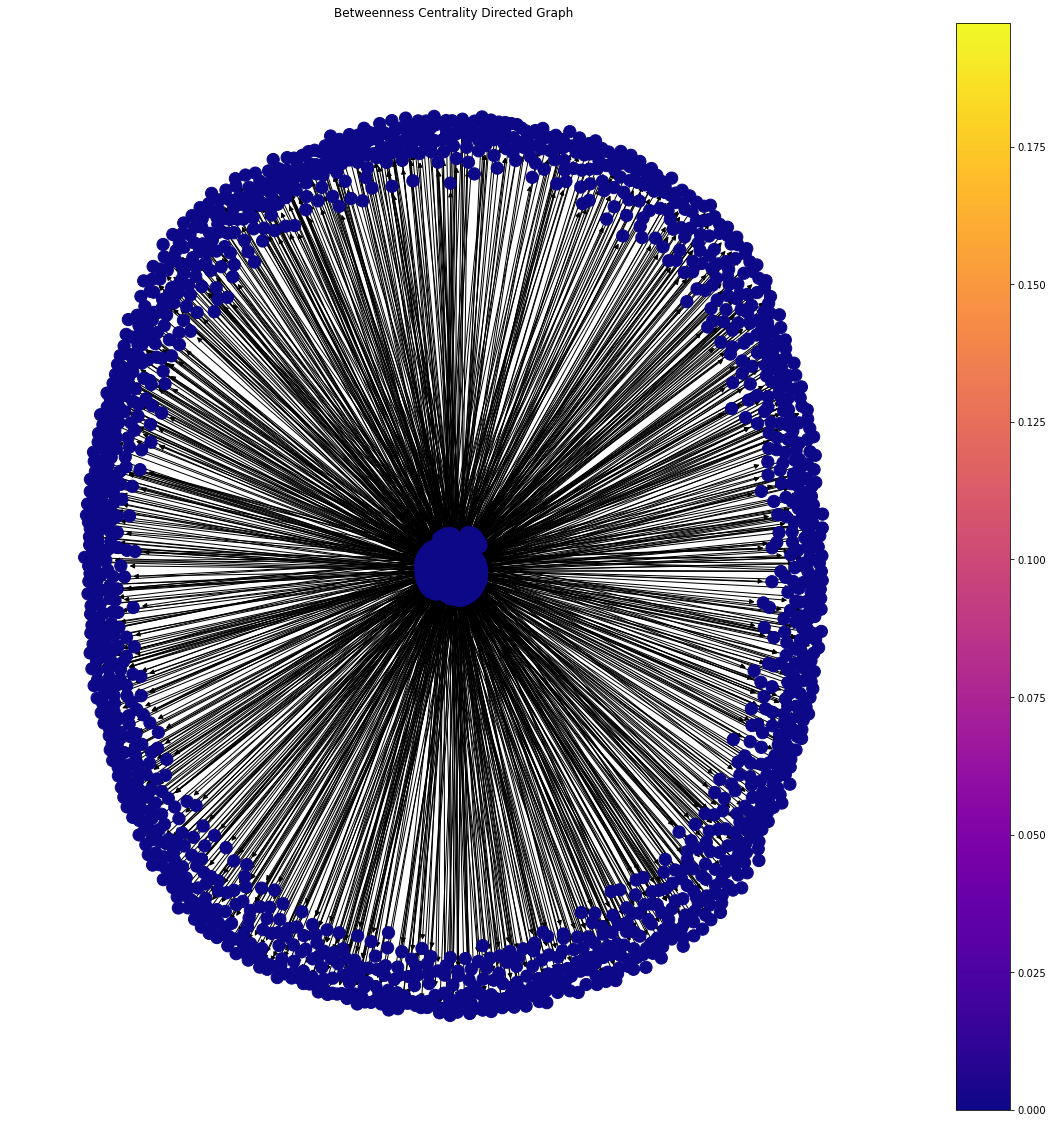

In [53]:
draw(
    complete_directed_graph,
    nx.spring_layout(complete_directed_graph),
    nx.betweenness_centrality(complete_directed_graph),
    'Betweenness Centrality Directed Graph',
    "data/betweenness_centrality_directed.pdf"
)

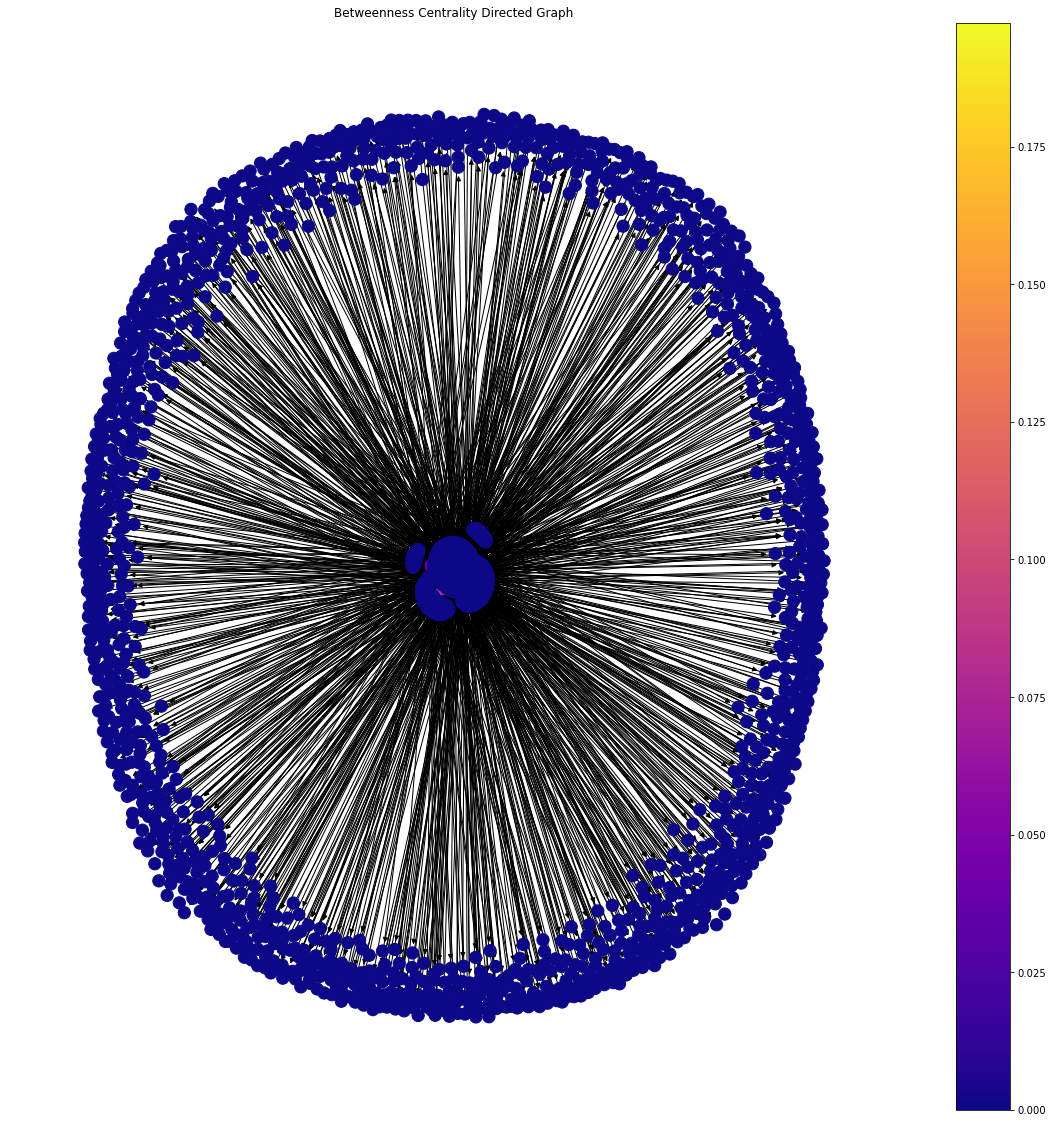

In [55]:
draw(
    complete_directed_graph,
    nx.spring_layout(complete_directed_graph),
    nx.betweenness_centrality(complete_directed_graph, normalized=True),
    'Betweenness Centrality Directed Graph',
    "data/betweenness_centrality_directed_norm.pdf"
)

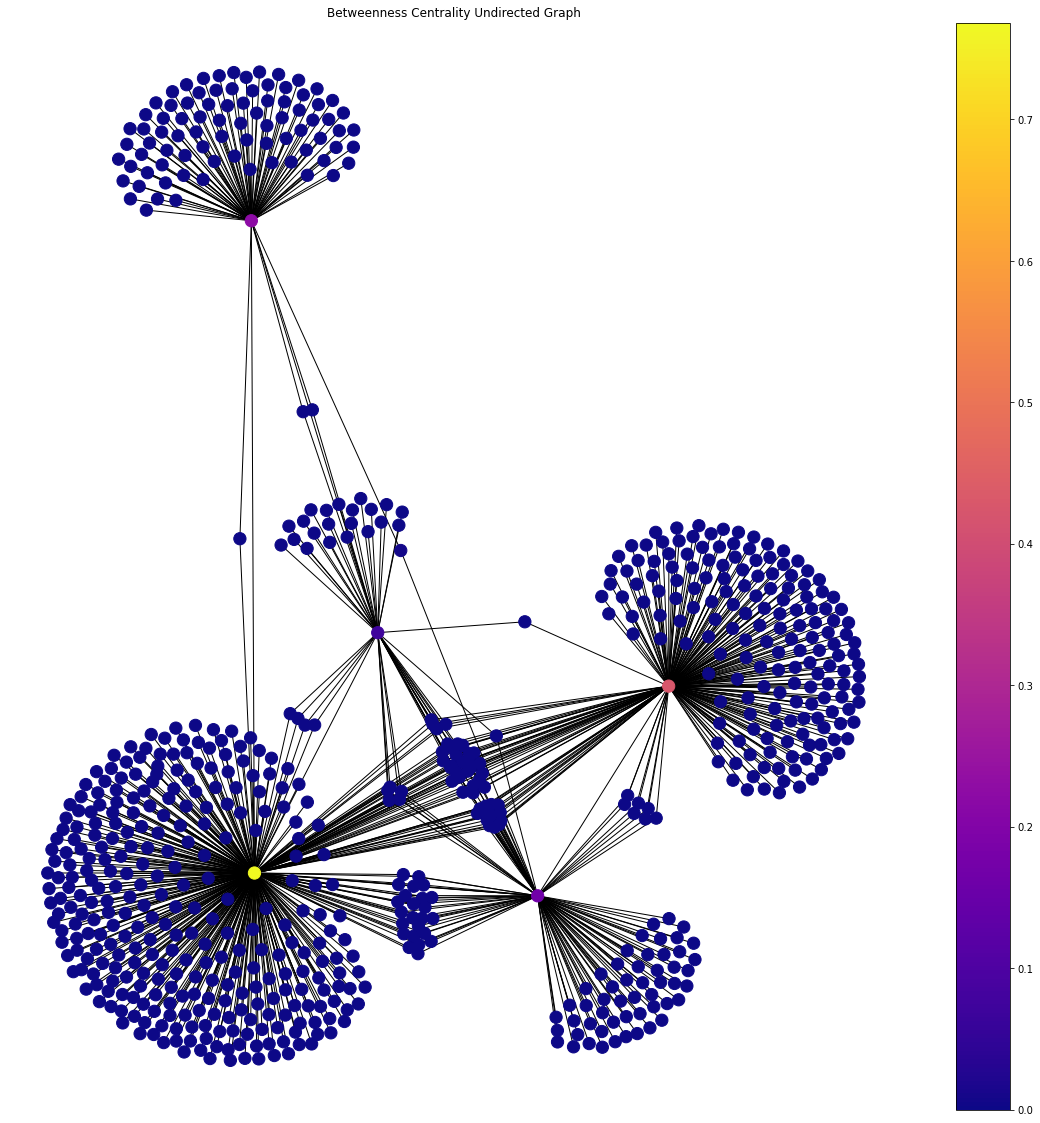

In [54]:
draw(
    complete_undirected_graph,
    nx.spring_layout(complete_undirected_graph),
    nx.betweenness_centrality(complete_undirected_graph),
    'Betweenness Centrality Undirected Graph',
    "data/betweenness_centrality_undirected.pdf"
)

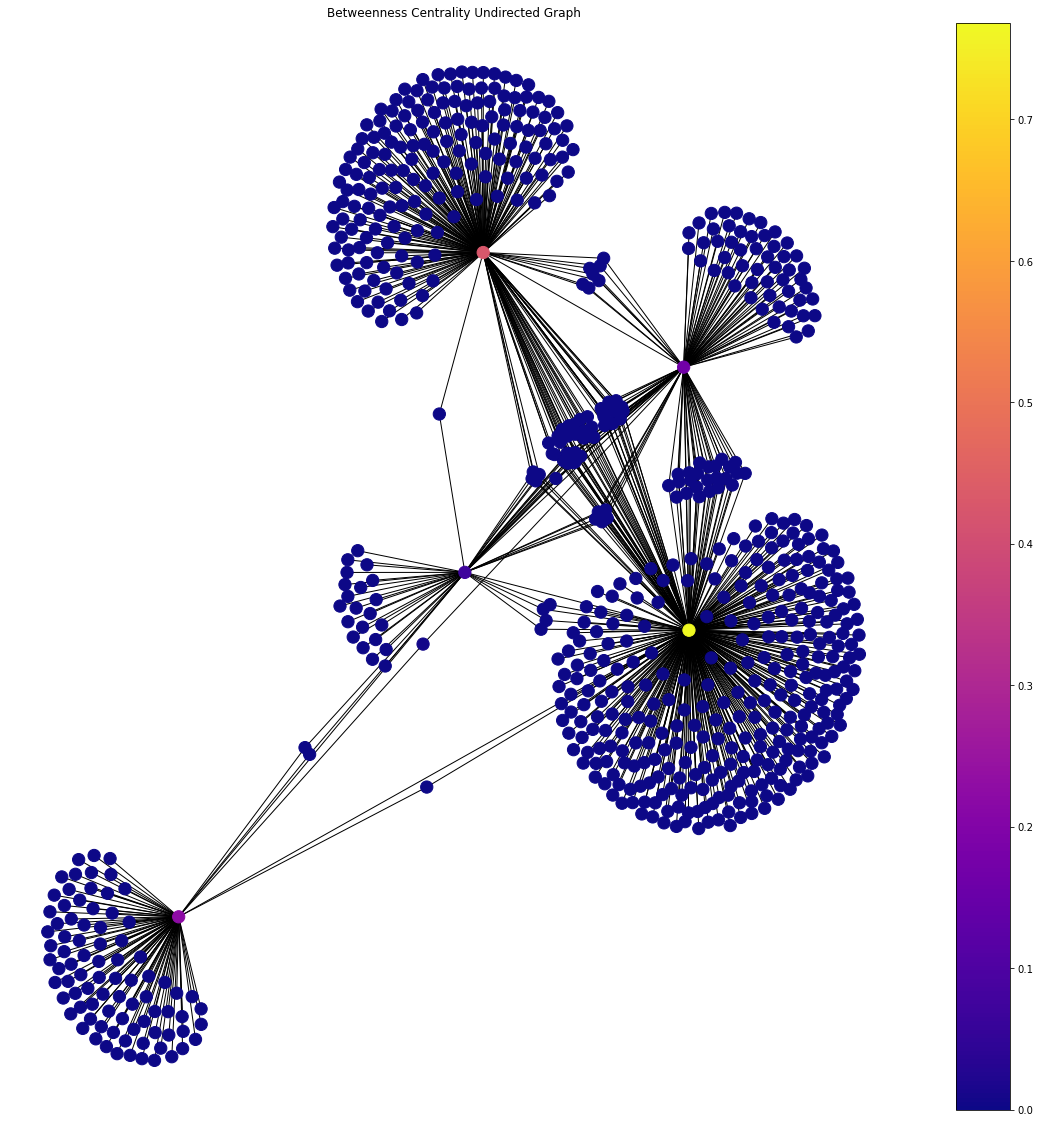

In [56]:
draw(
    complete_undirected_graph,
    nx.spring_layout(complete_undirected_graph),
    nx.betweenness_centrality(complete_undirected_graph, normalized=True),
    'Betweenness Centrality Undirected Graph',
    "data/betweenness_centrality_undirected_norm.pdf"
)

### 9.2 CLOSENESS CENTRALITY

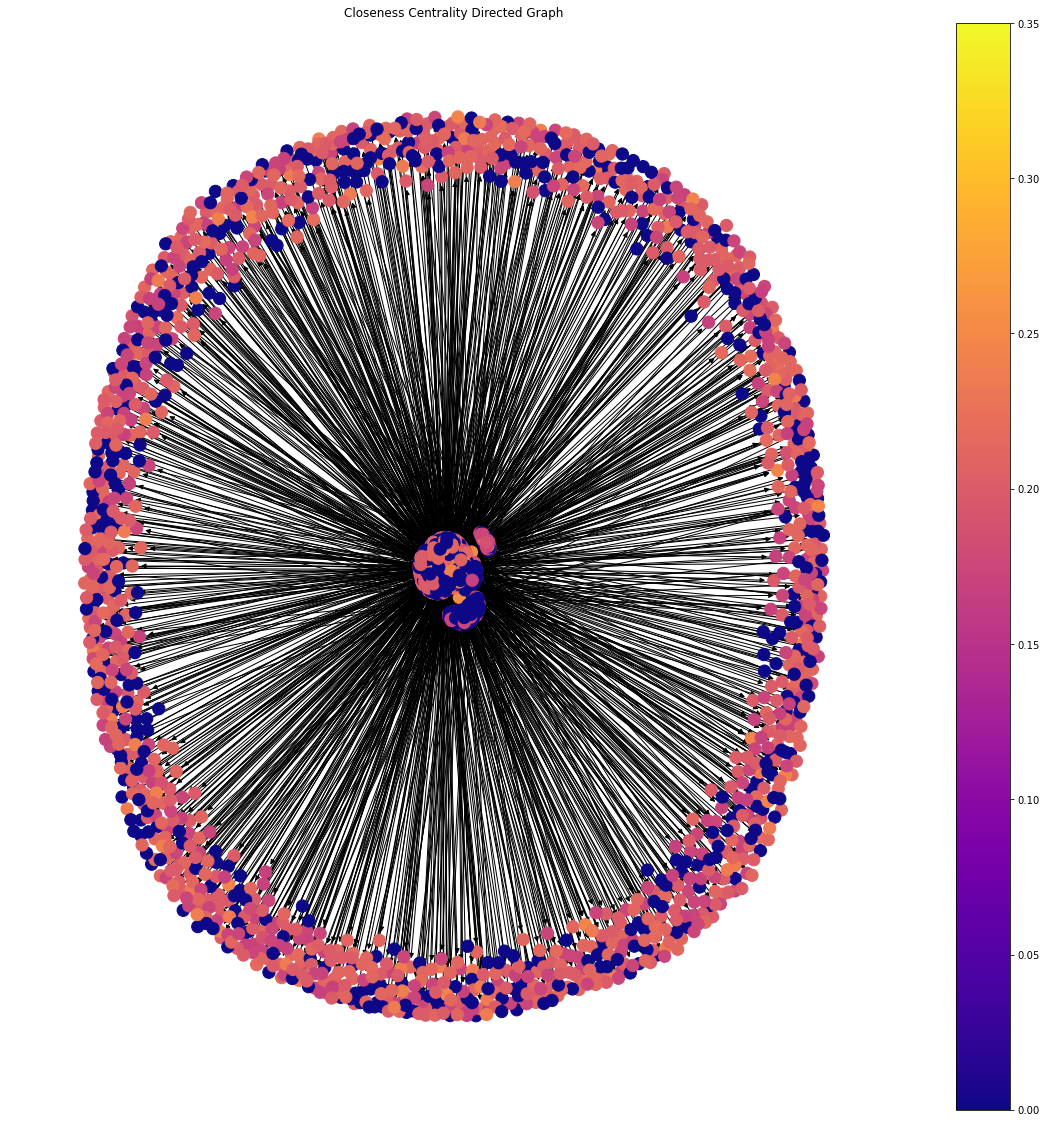

In [60]:
draw(
    complete_directed_graph,
    nx.spring_layout(complete_directed_graph),
    nx.closeness_centrality(complete_directed_graph),
    'Closeness Centrality Directed Graph',
    "data/closeness_centrality_directed.pdf"
)

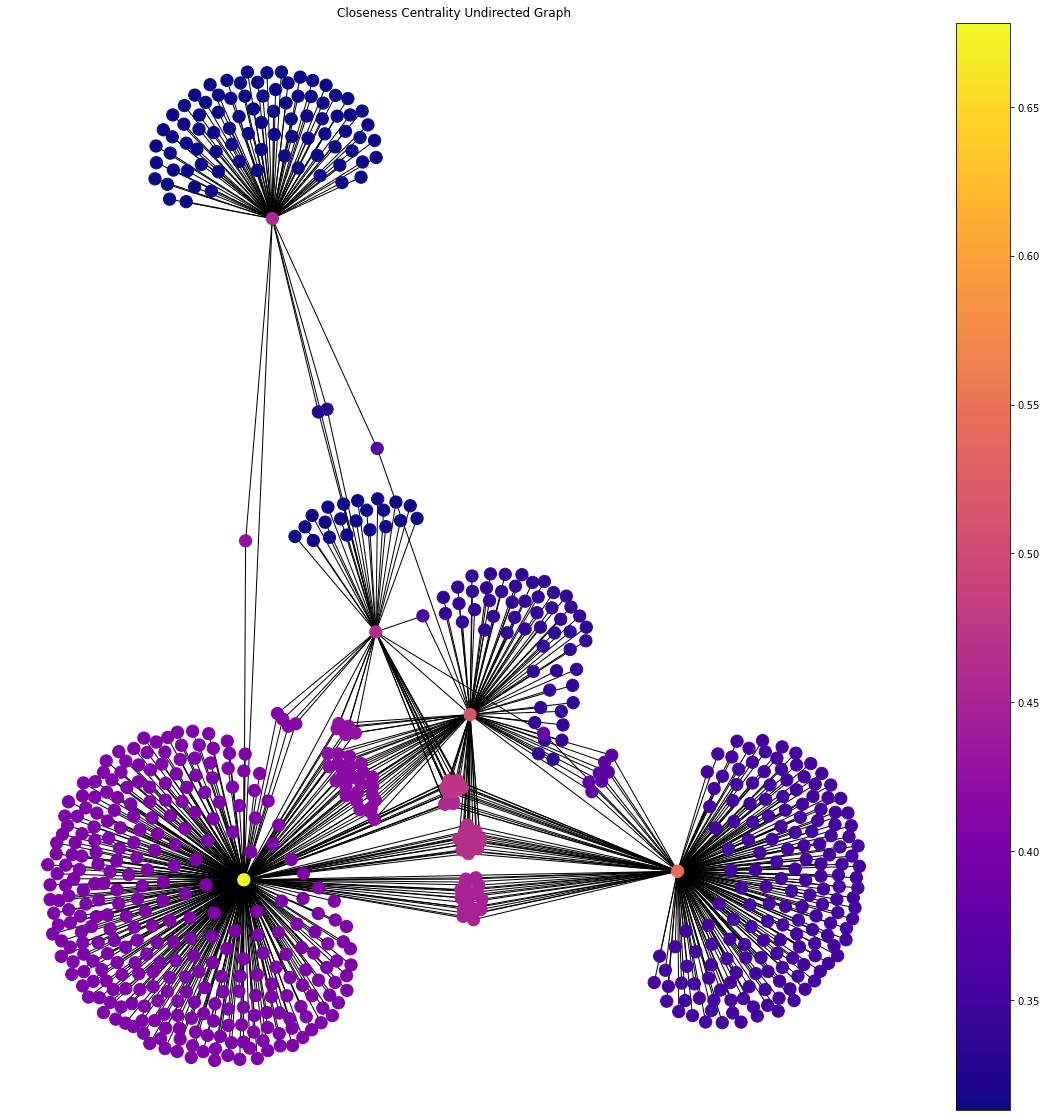

In [61]:
draw(
    complete_undirected_graph,
    nx.spring_layout(complete_undirected_graph),
    nx.closeness_centrality(complete_undirected_graph),
    'Closeness Centrality Undirected Graph',
    "data/closeness_centrality_undirected.pdf"
)

### 9.3 DEGREE CENTRALITY

In [ ]:
draw(
    complete_undirected_graph,
    nx.spring_layout(complete_undirected_graph),
    nx.degree_centrality(complete_directed_graph),
    'Closeness Centrality Undirected Graph',
    "data/degree_centrality_undirected.pdf"
)

## 9.
Calcolate le seguenti misure di centralità sul grafo:
- Betweenness centrality (betweenness_centrality)
- Closeness centrality (closeness_centrality)
- Degree centrality (degree_centrality)
- In-degree centrality (in_degree_centrality)
- Out-degree centrality (out_degree_centrality)
- Page Rank (pagerank)
- HITS (hits)

## 10.
Generate il sottografo indotto dal nodo damiano10 (ego_graph) e calcolate:
- Cricca massima (max_clique)
- Dimensione della cricca massima (large_clique_size)

## 11.
Calcolate la copertura minima degli archi (min_edge_cover) del grafo

## 12.
Calcolate i seguenti coefficienti per stimare la “small-world-ness” del grafo:
- Coefficiente omega (omega)
- Coefficiente sigma (sigma)

## 13.
Calcolare la correlazione di Pearson Rho e di Kendall Tau fra le misure di centralità;
riportare il risultato in due tabelle